# Ejercicio 1 — Laberinto con Búsqueda en Anchura

**Propósito**  
Mostrar la generación del laberinto y la solución paso a paso, con visualizaciones que permitan entender el proceso.

---

### ¿Cómo ejecutar?
1. Instala dependencias (solo la primera vez):
   ```bash
   pip install numpy matplotlib


In [70]:
# ==========================
# CELDA 1:
# Importa las librerías necesarias y define los parámetros generales
# ==========================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import heapq, random
from IPython.display import HTML

SEMILLA = 7
ALTO, ANCHO = 21, 21
INTERVALO = 120

random.seed(SEMILLA)
np.random.seed(SEMILLA)

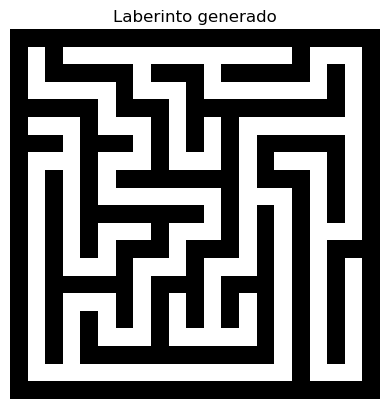

In [71]:
# ==========================
# CELDA 2:
# Genera un laberinto usando DFS (profundidad) y lo muestra en pantalla
# ==========================
def laberinto_dfs(filas, columnas):
    if filas % 2 == 0: filas += 1
    if columnas % 2 == 0: columnas += 1
    
    maze = np.ones((filas, columnas), dtype=int)
    visto = np.zeros((filas, columnas), dtype=bool)

    def vecinos(r, c):
        dirs = [(-2,0),(2,0),(0,-2),(0,2)]
        out = []
        for dr, dc in dirs:
            nr, nc = r+dr, c+dc
            if 0 <= nr < filas and 0 <= nc < columnas and not visto[nr, nc]:
                out.append((nr, nc))
        random.shuffle(out)
        return out

    def dfs(r, c):
        visto[r, c] = True
        maze[r, c] = 0
        for nr, nc in vecinos(r, c):
            if not visto[nr, nc]:
                maze[(r+nr)//2, (c+nc)//2] = 0
                dfs(nr, nc)

    dfs(1, 1)
    return maze

lab = laberinto_dfs(ALTO, ANCHO)

plt.imshow(lab, cmap="gray_r")
plt.title("Laberinto generado")
plt.axis("off")
plt.show()

In [72]:
def dfs_busqueda(origen, destino, mapa):
    stack = [origen]
    padres = {origen: None}
    visitados = set()
    recorrido = []

    while stack:
        actual = stack.pop()
        if actual in visitados:
            continue
        visitados.add(actual)
        recorrido.append(actual)

        if actual == destino:
            break

        r, c = actual
        for dr, dc in [(-1,0),(1,0),(0,-1),(0,1)]:
            nr, nc = r+dr, c+dc
            if 0 <= nr < mapa.shape[0] and 0 <= nc < mapa.shape[1]:
                if mapa[nr, nc] == 0 and (nr, nc) not in visitados:
                    padres[(nr, nc)] = actual
                    stack.append((nr, nc))

    return padres, recorrido

inicio = (1, 1)
meta = (ALTO-2, ANCHO-2)

came_from, explorados = dfs_busqueda(inicio, meta, lab)

camino = []
nodo = meta
while nodo:
    camino.append(nodo)
    nodo = came_from.get(nodo)
camino.reverse()


In [73]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Resolviendo con DFS (camino continuo)")
ax.axis("off")

cmap = plt.cm.colors.ListedColormap([
    "white",   # 0 libre
    "black",   # 1 pared
    "lightgray", # 2 visitado
    "lime",    # 3 camino final
    "blue",    # 4 actual
    "navy",    # 5 inicio
    "red"      # 6 meta
])
bounds = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

estado = np.copy(lab)
imagen = ax.imshow(estado, cmap=cmap, norm=norm)

def actualizar(frame):
    estado = np.copy(lab)

    if frame < len(explorados):
        for pos in explorados[:frame]:
            estado[pos] = 2
        estado[explorados[frame]] = 4
    else:
        for pos in explorados:
            estado[pos] = 2
        for pos in camino:
            estado[pos] = 3

    estado[inicio] = 5
    estado[meta] = 6

    imagen.set_data(estado)
    return [imagen]

frames_total = len(explorados) + 15
animacion = ani.FuncAnimation(fig, actualizar, frames=frames_total, interval=INTERVALO, blit=True)
plt.close(fig)
HTML(animacion.to_jshtml())


In [74]:
if camino:
    print("Camino encontrado con BFS")
    print(f"Longitud del camino: {len(camino)} pasos")
else:
    print("No existe un camino válido")


Camino encontrado con BFS
Longitud del camino: 97 pasos
